## Bag of Words

In [2]:
from nltk.tokenize import word_tokenize

sentence = 'The quick brown fox jumps over the lazy dog.'
sentence = sentence.lower()

words = word_tokenize(sentence)

word_dict = dict.fromkeys(words, 0)
for word in word_dict.keys():
    word_dict[word] = words.count(word)

word_dict

{'the': 2,
 'quick': 1,
 'brown': 1,
 'fox': 1,
 'jumps': 1,
 'over': 1,
 'lazy': 1,
 'dog': 1,
 '.': 1}

In [3]:
import pandas as pd

sentences = ['The quick brown fox jumps over the lazy dog.', 'The cat chases the mouse and it squeaks loudly.']
sentences = [sentence.lower() for sentence in sentences]


all_words = set()
for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
        all_words.add(word)

df = pd.DataFrame({}, index=range(len(sentences)), columns=list(all_words))

words_dict = dict.fromkeys(all_words, 0)

for i in range(len(sentences)):
    sentence_words = word_tokenize(sentences[i])
    for word in words_dict.keys():
        words_dict[word] = sentence_words.count(word)
    df.iloc[i, :] = words_dict

df.T

,0,1
jumps,1,0
fox,1,0
chases,0,1
quick,1,0
mouse,0,1
squeaks,0,1
lazy,1,0
dog,1,0
it,0,1
.,1,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('./bbc-text-data.csv') as file:
    data = file.readlines()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
x_vect = tfidf.fit_transform(data)

x_vect.shape

(2225, 29126)

In [6]:
from sklearn.cluster import KMeans

sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit_predict(x_vect)
    sse.append(km.inertia_)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
from kneed import KneeLocator

kl = KneeLocator(range(1,16),sse,curve="convex",direction="decreasing")
kl.elbow

8

In [8]:
km = KMeans(n_clusters=8,random_state=42)
labels = km.fit_predict(x_vect)
labels

array([0, 1, 4, ..., 6, 1, 4], dtype=int32)

In [9]:
df = pd.DataFrame(data,columns=['text'])
df[labels==2]

,text
11,virgin blue shares plummet 20% shares in austr...
15,s korean credit card firm rescued south korea ...
18,japanese banking battle at an end japan s sumi...
19,games maker fights for survival one of britain...
20,security warning over fbi virus the us feder...
...,...
2212,christmas shoppers flock to tills shops all ov...
2213,progress on new internet domains by early 2005...
2215,junk e-mails on relentless rise spam traffic i...
2217,rings of steel combat net attacks gambling is ...


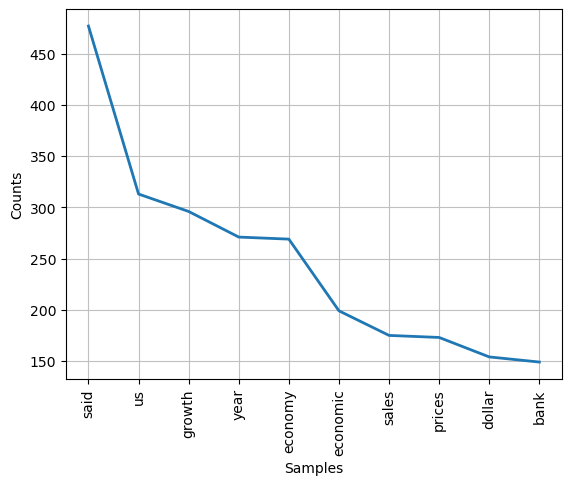

In [12]:
import string
from nltk.corpus import stopwords
from nltk import FreqDist

cluster_text = ' '
for text in df[labels==3]['text']:
    cluster_text = cluster_text + ' ' + text
    
words = word_tokenize(cluster_text)
words = [word for word in words if word not in string.punctuation]
stopword = stopwords.words('english')
words = [word for word in words if word not in set(stopword)]

freq = FreqDist(words)
freq.plot(10, cumulative=False);